### Endorheic bains, playas and Sinks in Arizona


This notebook queries the National Hydrography Dataset and the Watershed Boundary Dataset to look for Closed Basins (WBD), sinks (NHDPlus HR), and Playas (NHDplus HR)

#### Closed Basin (WBD)

**Definition:**

*A hydrologic unit (e.g., HUC12) where surface water does not drain to the ocean or another hydrologic unit, but instead terminates internally — often in depressions or playas.*

**Key Attribute:**

In WBD, such HUCs often have the ToHUC field equal to `CLOSED BASIN` (i.e., they drain into themselves).

**WBD Documentation:**

These are referred to as "internally draining basins" and are common in arid and semi-arid regions.

#### Sink (NHDPlus HR)

**Feature Class:** `NHDPoint`

**Definition:**

A point or area where surface flow disappears underground, with no visible surface outlet. It represents the terminal point of overland flow.

**Attribute:**

Feature Type (FType) = Sink

Usage: Used to identify terminal discharge points not associated with a stream confluence, often in karst, arid, or closed-basin landscapes.

#### Playa (NHDPlus HR)

**Feature Class:** `NHDWaterbody`

**Definition:**

*A flat-bottomed depression found in interior desert basins, that temporarily holds water during rainfall or snowmelt events, but usually dries out.*

**Attribute:**

Feature Type (FType) = Playa

**Characteristics:**

- Often ephemeral.
- Key surface expression of endorheic drainage.

Common in the southwestern U.S. (e.g., Arizona, New Mexico).




C:\Users\rl587\PROJECTS\PLAYAS\AZ-playas-endorheic-watersheds\.venv\Lib\site-packages\pygeoogc\core.py:293: UserWarning: Found 2 failed requests. Retrying ...
  resp = self._cleanup_resp(resp, payloads)


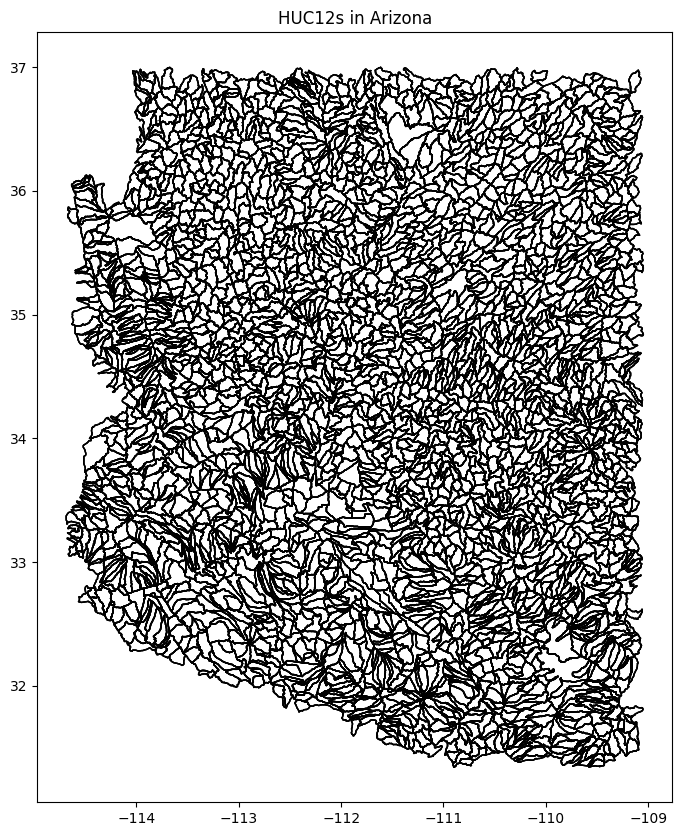

In [19]:

import geopandas as gpd
import matplotlib.pyplot as plt
from __future__ import annotations
import folium
from pygeohydro import NWIS, WBD
from pynhd import HP3D, NLDI, GeoConnex, NHDPlusHR, WaterData

# Instantiate WBD for HUC12s
wbd = WBD("huc12")

# Download all HUC12s that intersect the state of Arizona
az_huc12 = wbd.byids("states", ["AZ"])

# Quick plot to confirm
ax = az_huc12.plot(edgecolor="black", facecolor="none", figsize=(10, 10))
ax.set_title("HUC12s in Arizona")
plt.show()

In [34]:
internal_hucs = az_huc12[az_huc12['tohuc'] == 'CLOSED BASIN']

In [35]:
internal_hucs

,geometry,objectid,tnmid,metasourceid,sourcedatadesc,sourceoriginator,sourcefeatureid,loaddate,referencegnis_ids,areaacres,...,huc12,name,hutype,humod,tohuc,noncontributingareaacres,noncontributingareasqkm,globalid,shape_Length,shape_Area
98,"POLYGON ((-114.04239 35.80403, -114.04238 35.8...",24585,{E146A5EC-58FC-47EF-9977-A4C5F5A98971},{511D2AC8-11BA-45FC-AB98-F69D693D4C44},Watershed Boundary Dataset (WBD),Natural Resources and Conservation Service and...,None,1723704945000,10080,195717.02,...,150100070400,Red Lake,C,NC,CLOSED BASIN,195845.0,792.557297,{8D87B375-E29C-11E2-8094-0021280458E6},190277.382939,1.203194e+09
290,"POLYGON ((-113.26664 33.58936, -113.26807 33.5...",58079,{9AAB0014-538A-49CF-A334-937E9356AEEA},{511D2AC8-11BA-45FC-AB98-F69D693D4C44},Watershed Boundary Dataset (WBD),Natural Resources and Conservation Service and...,None,1723704945000,12455,25588.31,...,150701040306,Lower Tiger Wash,C,NC,CLOSED BASIN,25586.0,103.542960,{930FC4C0-E29C-11E2-8094-0021280458E6},67657.583731,1.497991e+08
420,"POLYGON ((-109.67191 34.4137, -109.67214 34.41...",34549,{65298C8D-DBEC-415F-9271-C3113628ABC0},{511D2AC8-11BA-45FC-AB98-F69D693D4C44},Watershed Boundary Dataset (WBD),Natural Resources and Conservation Service and...,None,1723704945000,13911,40561.39,...,150200020406,Windsor Valley,C,NC,CLOSED BASIN,40700.0,164.707202,{8DDE7241-E29C-11E2-8094-0021280458E6},98652.812396,2.412638e+08
447,"POLYGON ((-112.66816 35.94582, -112.66839 35.9...",34626,{7C82EB70-DE14-49F2-AE5D-98627CDCBB84},{511D2AC8-11BA-45FC-AB98-F69D693D4C44},Watershed Boundary Dataset (WBD),Natural Resources and Conservation Service and...,None,1723704945000,20795,14215.07,...,150100041001,Hazen Hole Tank,C,NC,CLOSED BASIN,14206.0,57.489693,{8D4B42B7-E29C-11E2-8094-0021280458E6},47810.064855,8.784484e+07
473,"POLYGON ((-109.56486 34.41309, -109.56527 34.4...",34692,{8F781872-D05C-4164-828A-89F3899762DD},{511D2AC8-11BA-45FC-AB98-F69D693D4C44},Watershed Boundary Dataset (WBD),Natural Resources and Conservation Service and...,None,1723704945000,9016,22161.50,...,150200020301,Ortega Sink,C,NC,CLOSED BASIN,22144.0,89.613668,{8DDD67FA-E29C-11E2-8094-0021280458E6},63962.603464,1.319192e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,"POLYGON ((-111.43484 31.5412, -111.43494 31.54...",31573,{63029FA2-C95E-4805-A84A-9B4F57B65345},{511D2AC8-11BA-45FC-AB98-F69D693D4C44},Watershed Boundary Dataset (WBD),Natural Resources and Conservation Service and...,None,1723704945000,"812,520",21522.62,...,150503040202,Arroyo del Compartidero-Aguirre Lake,C,LE,CLOSED BASIN,0.0,0.000000,{8F4F11D4-E29C-11E2-8094-0021280458E6},59836.708066,1.203140e+08
8763,"POLYGON ((-111.86242 36.82903, -111.86277 36.8...",100734,{7074F365-8176-42B4-B772-344A7598A4D6},{511D2AC8-11BA-45FC-AB98-F69D693D4C44},Watershed Boundary Dataset (WBD),Natural Resources and Conservation Service and...,None,1723704945000,9510,25873.92,...,140700070701,Pinnacle Valley,C,NC,CLOSED BASIN,25846.0,104.595144,{EC00B8FF-FC17-4A46-9BC7-78347EB6ADE7},91346.430100,1.636605e+08
8768,"POLYGON ((-111.09385 36.56849, -111.09421 36.5...",100739,{10FC0CBB-AB23-429C-B500-F66B1C57F7BD},{511D2AC8-11BA-45FC-AB98-F69D693D4C44},Watershed Boundary Dataset (WBD),Natural Resources and Conservation Service and...,None,1723704945000,20664,51996.63,...,140700060404,Black Rock,C,NC,CLOSED BASIN,51933.0,210.165580,{FBF909AD-D5E8-4AC5-A918-F932DCC40D2A},111466.724802,3.271915e+08
8808,"POLYGON ((-111.27021 36.68695, -111.27064 36.6...",100834,{01C7E0C6-0E5C-4711-9561-B3F9B403C5BC},{511D2AC8-11BA-45FC-AB98-F69D693D4C44},Watershed Boundary Dataset (WBD),Natural Resources and Conservation Service and...,None,1723704945000,20882,45255.29,...,140700060701,Low Valley,C,NC,CLOSED BASIN,45201.0,182.922119,{0521F9ED-B868-4E94-B8A5-2583FD125F58},104886.683547,2.847576e+08


In [36]:
print(f"Total internal HUC12s: {len(internal_hucs)}")
print(f"Empty geometries: {internal_hucs.geometry.is_empty.sum()}")
print(f"Invalid geometries: {~internal_hucs.is_valid}")

Total internal HUC12s: 108
Empty geometries: 0
Invalid geometries: 98      False
290     False
420     False
447     False
473     False
        ...  
8758    False
8763    False
8768    False
8808    False
8815    False
Length: 108, dtype: bool


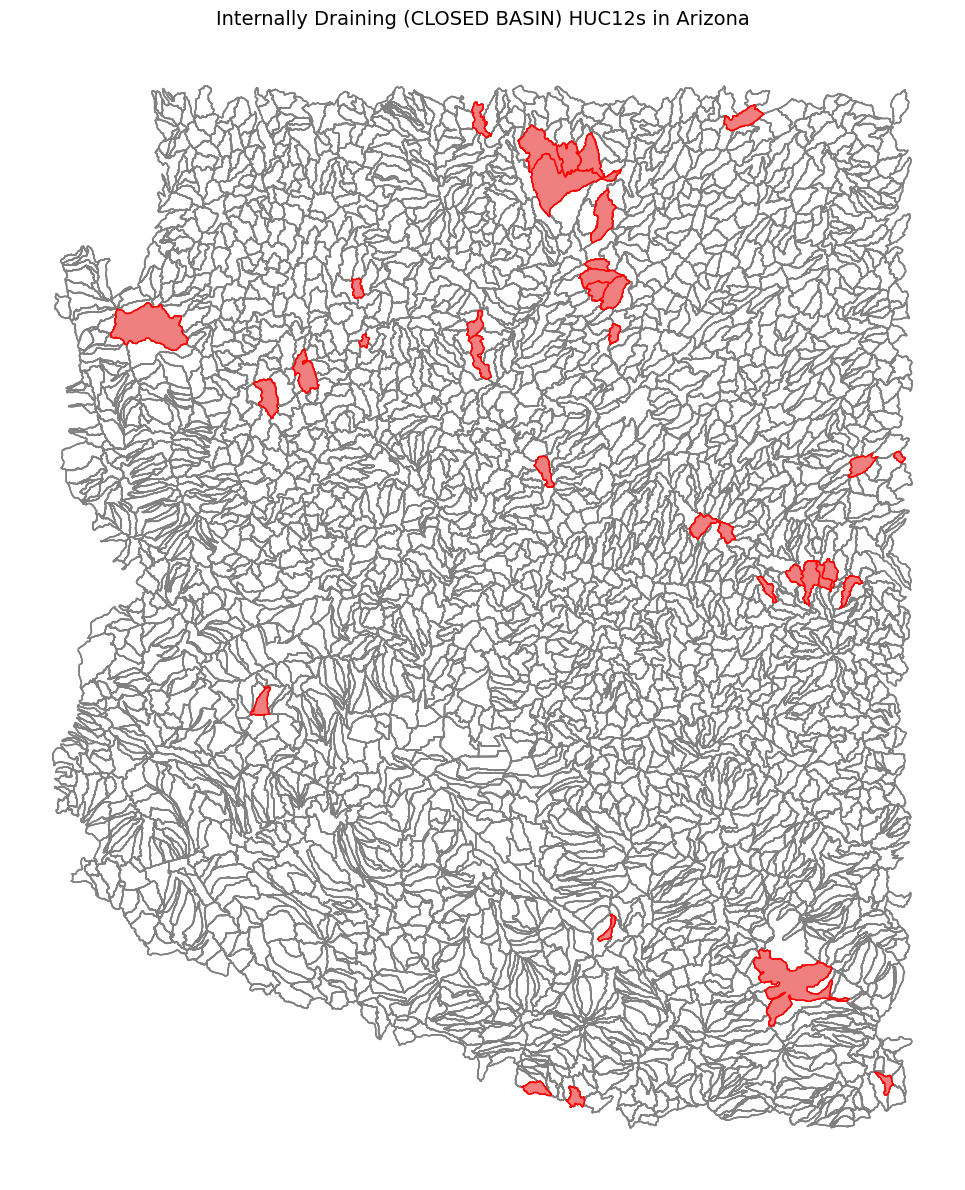

In [37]:
# Plot context: all AZ HUC12s
ax = az_huc12.plot(edgecolor="gray", facecolor="none", figsize=(12, 12))

# Overlay internal HUC12s
internal_hucs.plot(ax=ax, edgecolor="red", facecolor="lightcoral")

# Final touches
ax.set_title("Internally Draining (CLOSED BASIN) HUC12s in Arizona", fontsize=14)
ax.set_axis_off()
plt.tight_layout()
plt.show()

In [39]:
# Step 1: Initialize with closed basin HUC12s
internal_set = set(internal_hucs['huc12'])

# Step 2: Iteratively add upstream contributors
for _ in range(20):  # Cap at 20 iterations to avoid infinite loops
    upstream = az_huc12[az_huc12['tohuc'].isin(internal_set)]
    new_hucs = set(upstream['huc12']) - internal_set
    if not new_hucs:
        break
    internal_set.update(new_hucs)

# Step 3: Create final GeoDataFrame of all contributing HUC12s
all_contributors = az_huc12[az_huc12['huc12'].isin(internal_set)]

In [40]:
all_contributors

,geometry,objectid,tnmid,metasourceid,sourcedatadesc,sourceoriginator,sourcefeatureid,loaddate,referencegnis_ids,areaacres,...,huc12,name,hutype,humod,tohuc,noncontributingareaacres,noncontributingareasqkm,globalid,shape_Length,shape_Area
97,"POLYGON ((-113.19505 35.46623, -113.19535 35.4...",24584,{F6D85130-FB36-4B2F-B825-3C6B9265DDF7},{511D2AC8-11BA-45FC-AB98-F69D693D4C44},Watershed Boundary Dataset (WBD),Natural Resources and Conservation Service and...,None,1723704945000,"8572,12746",25487.73,...,150100070102,Nelson Canyon-Truxton Wash,S,NM,150100070104,0.0,0.000000,{8D530F88-E29C-11E2-8094-0021280458E6},73748.822216,1.557561e+08
98,"POLYGON ((-114.04239 35.80403, -114.04238 35.8...",24585,{E146A5EC-58FC-47EF-9977-A4C5F5A98971},{511D2AC8-11BA-45FC-AB98-F69D693D4C44},Watershed Boundary Dataset (WBD),Natural Resources and Conservation Service and...,None,1723704945000,10080,195717.02,...,150100070400,Red Lake,C,NC,CLOSED BASIN,195845.0,792.557297,{8D87B375-E29C-11E2-8094-0021280458E6},190277.382939,1.203194e+09
285,"POLYGON ((-113.2207 33.85294, -113.22075 33.85...",58073,{13ED537B-96E7-4734-B632-94D59CB1808A},{511D2AC8-11BA-45FC-AB98-F69D693D4C44},Watershed Boundary Dataset (WBD),Natural Resources and Conservation Service and...,None,1723704945000,2014,9997.70,...,150701040301,Browns Canyon Wash,S,NM,150701040304,0.0,0.000000,{930F4065-E29C-11E2-8094-0021280458E6},37733.734471,5.878231e+07
286,"POLYGON ((-113.18308 33.87121, -113.18322 33.8...",58074,{FFA9106F-C818-4C64-82EC-1D1F8A252382},{511D2AC8-11BA-45FC-AB98-F69D693D4C44},Watershed Boundary Dataset (WBD),Natural Resources and Conservation Service and...,None,1723704945000,12455,26545.03,...,150701040302,Upper Tiger Wash,S,NM,150701040304,0.0,0.000000,{930F5DAE-E29C-11E2-8094-0021280458E6},63491.170039,1.559611e+08
287,"POLYGON ((-113.29073 33.73176, -113.2907 33.73...",58075,{2B75C577-264C-47A3-BB5F-727817B9EC00},{511D2AC8-11BA-45FC-AB98-F69D693D4C44},Watershed Boundary Dataset (WBD),Natural Resources and Conservation Service and...,None,1723704945000,1738,6597.83,...,150701040303,Blue Tank Canyon,S,NM,150701040306,0.0,0.000000,{930F73E7-E29C-11E2-8094-0021280458E6},30305.559455,3.873752e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8768,"POLYGON ((-111.09385 36.56849, -111.09421 36.5...",100739,{10FC0CBB-AB23-429C-B500-F66B1C57F7BD},{511D2AC8-11BA-45FC-AB98-F69D693D4C44},Watershed Boundary Dataset (WBD),Natural Resources and Conservation Service and...,None,1723704945000,20664,51996.63,...,140700060404,Black Rock,C,NC,CLOSED BASIN,51933.0,210.165580,{FBF909AD-D5E8-4AC5-A918-F932DCC40D2A},111466.724802,3.271915e+08
8808,"POLYGON ((-111.27021 36.68695, -111.27064 36.6...",100834,{01C7E0C6-0E5C-4711-9561-B3F9B403C5BC},{511D2AC8-11BA-45FC-AB98-F69D693D4C44},Watershed Boundary Dataset (WBD),Natural Resources and Conservation Service and...,None,1723704945000,20882,45255.29,...,140700060701,Low Valley,C,NC,CLOSED BASIN,45201.0,182.922119,{0521F9ED-B868-4E94-B8A5-2583FD125F58},104886.683547,2.847576e+08
8815,"POLYGON ((-111.52711 36.77185, -111.52768 36.7...",100838,{6D810D6C-1589-445A-B584-8790841A86D1},{511D2AC8-11BA-45FC-AB98-F69D693D4C44},Watershed Boundary Dataset (WBD),Natural Resources and Conservation Service and...,None,1723704945000,20716,83890.65,...,140700061101,Circular White Ridge,C,NC,CLOSED BASIN,36346.0,147.087174,{A68E0F04-3578-41E7-BFB9-2AA3BF15F3A4},161977.474781,5.285908e+08
8863,"POLYGON ((-113.1133 35.46272, -113.11368 35.46...",24164,{7FDE17C6-676D-44EE-ADE1-F52C3646979F},{2D73CE1E-9748-4BD9-A857-7DDFA6F1D2AC},None,None,None,1508707183000,None,10472.67,...,150602010105,150602010105,S,NM,150602010109,0.0,0.000000,{8BFC8B2A-E29C-11E2-8094-0021280458E6},38499.403169,6.396912e+07


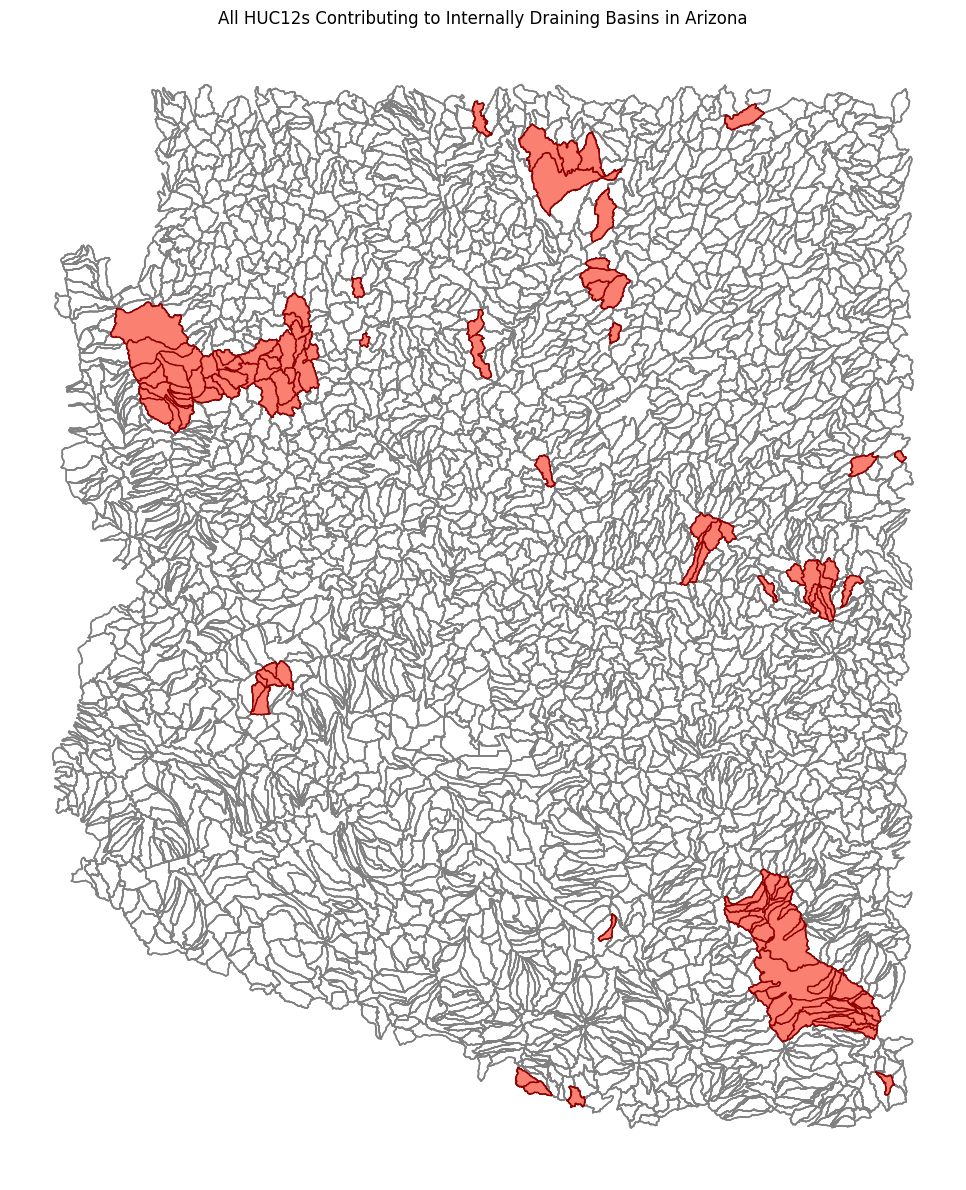

In [41]:
ax = az_huc12.plot(edgecolor="gray", facecolor="none", figsize=(12, 12))
all_contributors.plot(ax=ax, edgecolor="darkred", facecolor="salmon")
ax.set_title("All HUC12s Contributing to Internally Draining Basins in Arizona")
ax.set_axis_off()
plt.tight_layout()
plt.show()

In [42]:
## save out as shapefile
#all_contributors.to_file("../data/az_contributing_to_closed_basins.shp")

C:\Users\rl587\AppData\Local\Temp\ipykernel_35732\1590392232.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  all_contributors.to_file("../data/az_contributing_to_closed_basins.shp")
C:\Users\rl587\PROJECTS\PLAYAS\AZ-playas-endorheic-watersheds\.venv\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'metasourceid' to 'metasource'
  ogr_write(
C:\Users\rl587\PROJECTS\PLAYAS\AZ-playas-endorheic-watersheds\.venv\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'sourcedatadesc' to 'sourcedata'
  ogr_write(
C:\Users\rl587\PROJECTS\PLAYAS\AZ-playas-endorheic-watersheds\.venv\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'sourceoriginator' to 'sourceorig'
  ogr_write(
C:\Users\rl587\PROJECTS\PLAYAS\AZ-playas-endorheic-watersheds\.venv\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 

In [58]:
from pygeohydro import WBD
from pynhd import HP3D, NLDI, GeoConnex, NHDPlusHR, WaterData

wbd = WBD("huc8")  # or "huc8"
az_huc8 = wbd.byids("States", ["AZ"])

In [67]:
az_geom = az_huc8.union_all()
az_crs = az_huc8.crs


In [70]:
# Step 3: Query NHD point features that intersect the Arizona HUC8s
nhd = NHD("point")
az_points = nhd.bygeom(az_geom, geo_crs=az_crs)
print(az_points.columns)

Index(['geometry', 'OBJECTID', 'FDATE', 'RESOLUTION', 'GNIS_ID', 'GNIS_NAME',
       'REACHCODE', 'FTYPE', 'FCODE', 'PERMANENT_IDENTIFIER', 'GLOBALID'],
      dtype='object')


In [76]:
az_points['FCODE'].unique()

array([48800, 45800, 43613, 36700, 43619, 43618, 43612, 45000, 48700,
       48500, 36900, 34300, 36701])

In [77]:

# Step 4: Filter to sink features by FCode
sink_fcodes = {45000, 45001, 45002, 45003}
az_sinks = az_points[az_points["FCODE"].isin(sink_fcodes)]

In [78]:
az_sinks

,geometry,OBJECTID,FDATE,RESOLUTION,GNIS_ID,GNIS_NAME,REACHCODE,FTYPE,FCODE,PERMANENT_IDENTIFIER,GLOBALID
545,POINT (-110.06642 34.99548),197516,1114067064000,2,None,None,None,450,45000,134391980,{59ABABF1-4CA9-11E1-BCF4-0021280458E6}
546,POINT (-110.08833 34.99836),197517,1114067064000,2,None,None,None,450,45000,134391981,{59ABC6AF-4CA9-11E1-BCF4-0021280458E6}
548,POINT (-110.07558 34.90771),197519,1114067064000,2,None,None,None,450,45000,134391983,{59ABFE65-4CA9-11E1-BCF4-0021280458E6}
557,POINT (-110.0155 34.99925),197529,1114067064000,2,None,None,None,450,45000,134391994,{59AD1B88-4CA9-11E1-BCF4-0021280458E6}
559,POINT (-110.06817 34.90491),197531,1114067064000,2,None,None,None,450,45000,134391997,{59AD5315-4CA9-11E1-BCF4-0021280458E6}
...,...,...,...,...,...,...,...,...,...,...,...
12807,POINT (-113.05613 33.88952),294757,1175737350000,2,None,None,None,450,45000,153178728,{3CBCE93F-4CA9-11E1-BCF4-0021280458E6}
12819,POINT (-112.80561 33.27744),294769,1175737351000,2,None,None,None,450,45000,153178752,{3CBE3DF7-4CA9-11E1-BCF4-0021280458E6}
12820,POINT (-113.07782 33.94178),294770,1175737351000,2,None,None,None,450,45000,153178754,{3CBE6053-4CA9-11E1-BCF4-0021280458E6}
12838,POINT (-112.8518 33.46167),294788,1175737355000,2,None,None,None,450,45000,153178883,{3CC065F7-4CA9-11E1-BCF4-0021280458E6}


In [79]:
## Save sinks to file
#az_sinks.to_file("../data/az_nhd_sinks.shp")

C:\Users\rl587\AppData\Local\Temp\ipykernel_35732\3400262017.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  az_sinks.to_file("../data/az_nhd_sinks.shp")
C:\Users\rl587\PROJECTS\PLAYAS\AZ-playas-endorheic-watersheds\.venv\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'PERMANENT_IDENTIFIER' to 'PERMANENT_'
  ogr_write(


In [84]:
nhd = NHD("waterbody_hr")
az_waterbody = nhd.bygeom(az_geom, geo_crs=az_crs)
#print(az_waterbody.columns)
playa_fcodes = {36100}
az_playas = az_waterbody[az_waterbody["FCODE"].isin(playa_fcodes)]

In [85]:
## save playas to file
#az_playas.to_file("../az_nhd_playas.shp")

C:\Users\rl587\AppData\Local\Temp\ipykernel_35732\22193584.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  az_playas.to_file("../az_nhd_playas.shp")
C:\Users\rl587\PROJECTS\PLAYAS\AZ-playas-endorheic-watersheds\.venv\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'PERMANENT_IDENTIFIER' to 'PERMANENT_'
  ogr_write(
C:\Users\rl587\PROJECTS\PLAYAS\AZ-playas-endorheic-watersheds\.venv\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'VISIBILITYFILTER' to 'VISIBILITY'
  ogr_write(
C:\Users\rl587\PROJECTS\PLAYAS\AZ-playas-endorheic-watersheds\.venv\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'SHAPE_Length' to 'SHAPE_Leng'
  ogr_write(
C:\Users\rl587\PROJECTS\PLAYAS\AZ-playas-endorheic-watersheds\.venv\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Value 176864204.82551587 of field SHAPE_Area of feature 119 

C:\Users\rl587\AppData\Local\Temp\ipykernel_35732\3002324090.py:14: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


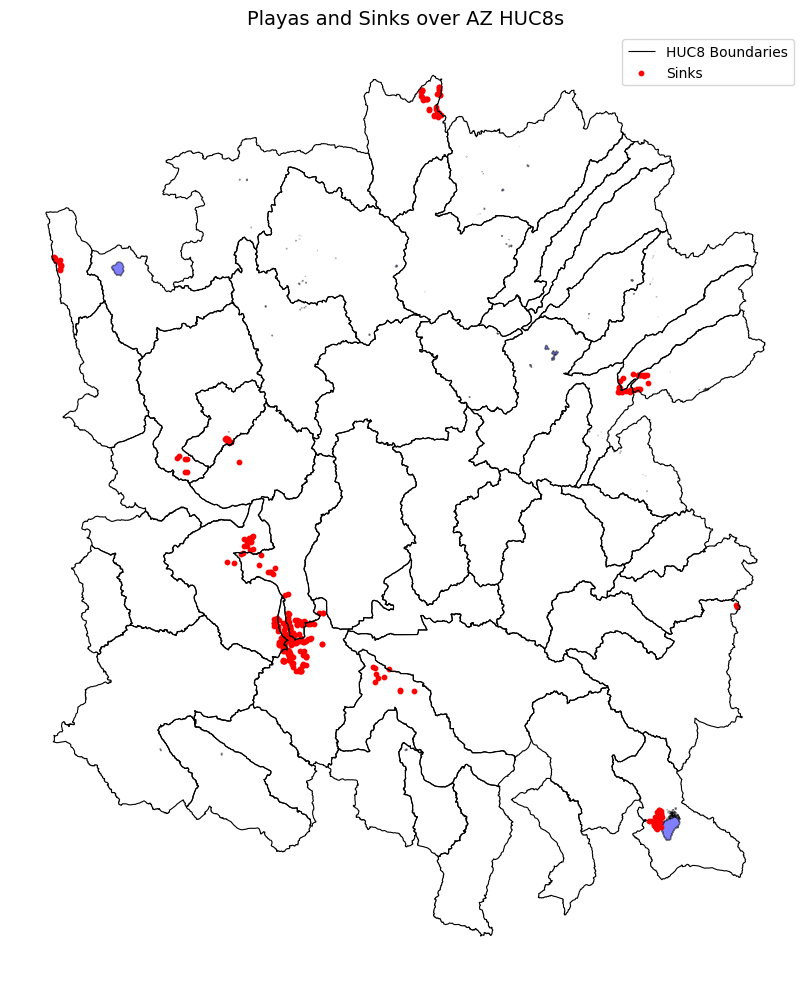

In [86]:
# Set up the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot HUC8 boundaries
az_huc8.boundary.plot(ax=ax, edgecolor="black", linewidth=0.8, label="HUC8 Boundaries")

# Plot playas
az_playas.plot(ax=ax, color="blue", alpha=0.5, edgecolor="k", label="Playas")

# Plot sinks
az_sinks.plot(ax=ax, color="red", markersize=10, label="Sinks")

# Add legend and title
ax.legend()
ax.set_title("Playas and Sinks over AZ HUC8s", fontsize=14)
ax.set_axis_off()
plt.tight_layout()
plt.show()